In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv ("SupermarketSales.csv")
df.head(6)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-02-02 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-02-02 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-02-02 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-02-02 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-02-02 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2024-02-02 18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,Monday,18


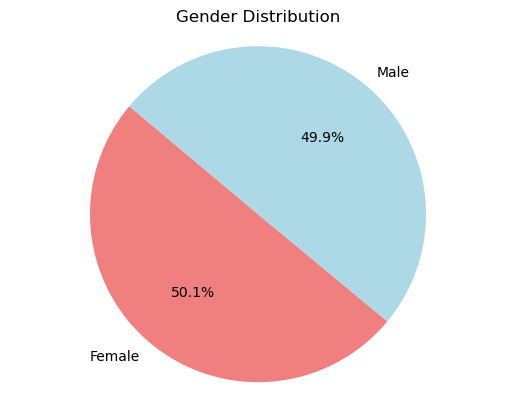

In [2]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightcoral', 'lightblue'] 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Gender Distribution')
plt.show()

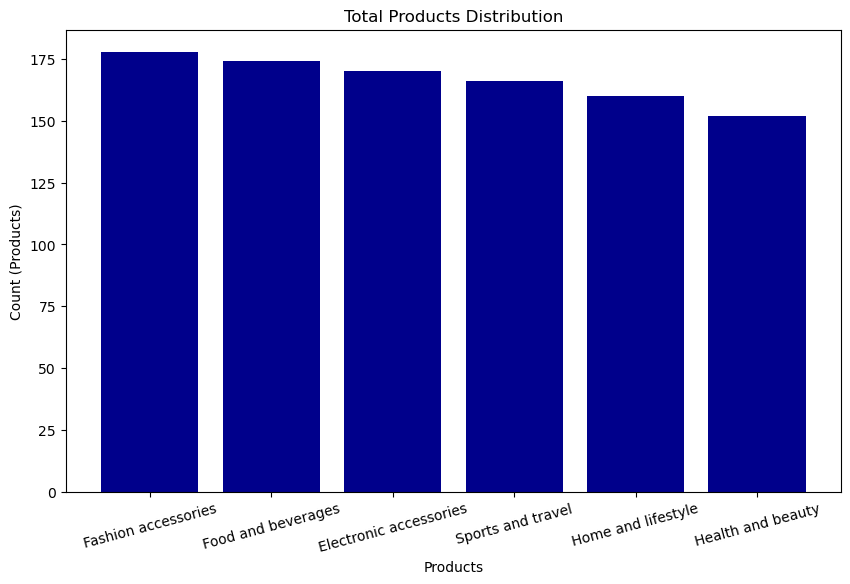

In [7]:
products = df['Product line'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(products.index, products.values , color = 'darkblue')
plt.xlabel ('Products')
plt.ylabel ('Count (Products)')
plt.title ('Total Products Distribution')
plt.xticks(rotation=15) 
plt.show()

Text(0.5, 1.0, 'Customer type by Gender')

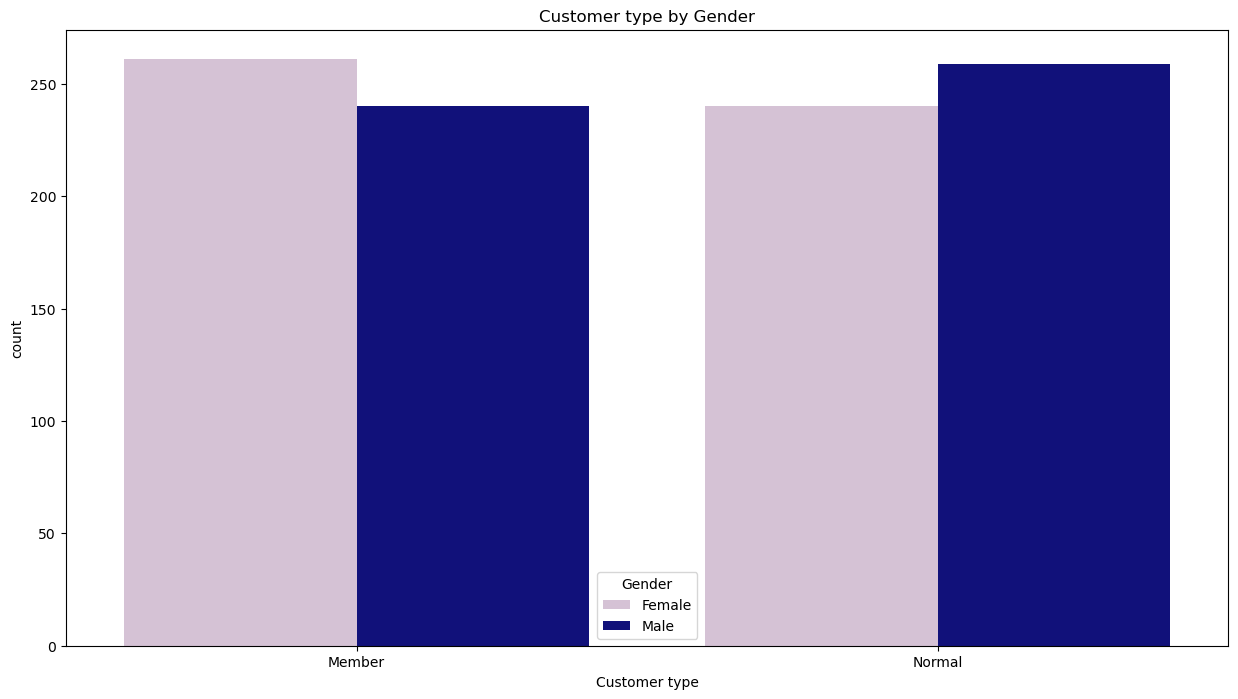

In [8]:
plt.figure(figsize=(15,8))
custom_palette = {'Male': 'darkblue', 'Female': '#D8BFD8'}
sns.countplot(data=df,x=df['Customer type'],hue =df['Gender'], palette=custom_palette)
plt.title('Customer type by Gender')

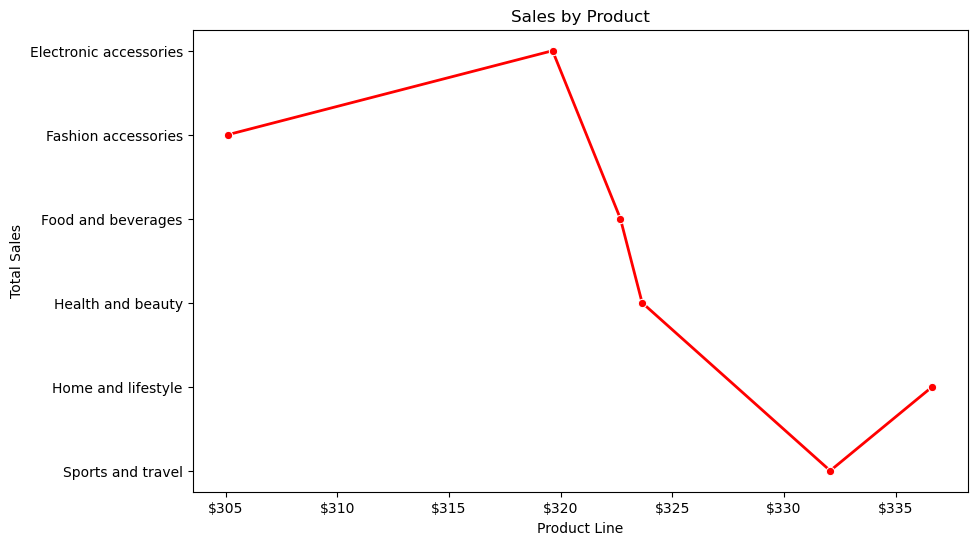

In [9]:
monthly_sales = df.groupby('Product line')['Total'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Total', y='Product line', data= monthly_sales, marker='o', color='Red', linewidth=2)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Sales by Product')
plt.gca().xaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

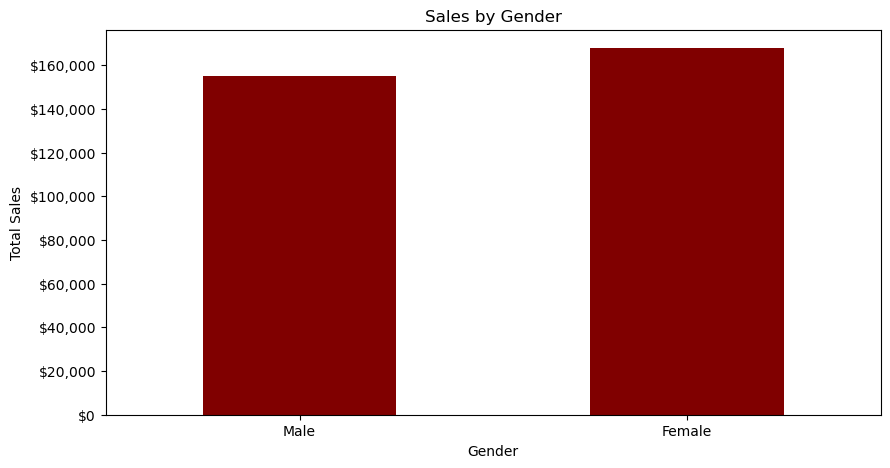

In [10]:
genderspent = df.groupby('Gender')['Total'].sum()
genderspent = genderspent.sort_values()

plt.figure(figsize=(10, 5))
genderspent.plot(kind='bar', color='maroon')
plt.title("Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)

plt.xticks(rotation=0)
plt.show()

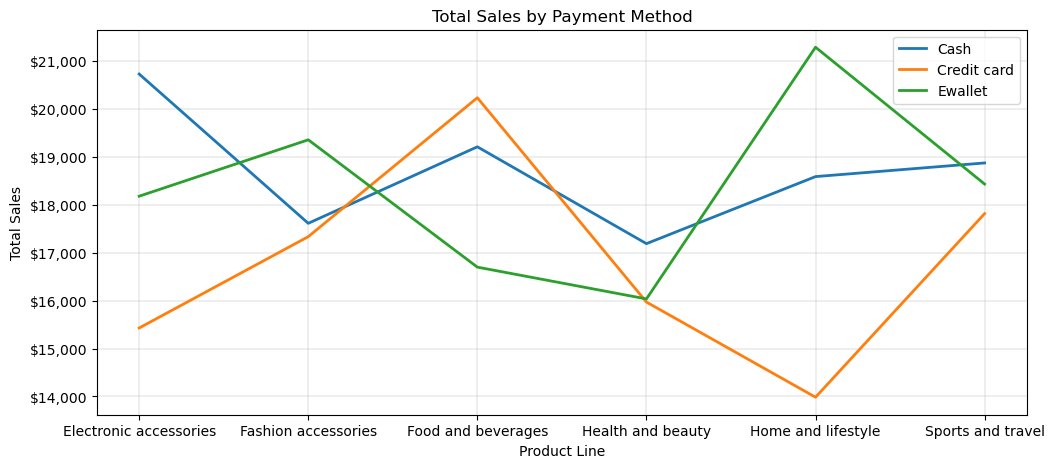

In [11]:
plt_group = df.groupby(['Product line', 'Payment'])['Total'].sum().reset_index()
pivot_data = plt_group.pivot_table(index='Product line', columns='Payment', values='Total')
ax = pivot_data.plot(kind='line', figsize=(12, 5), linewidth=2.0)
ax.grid(which='both', linewidth=0.3)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Payment Method')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize='10')
plt.show()

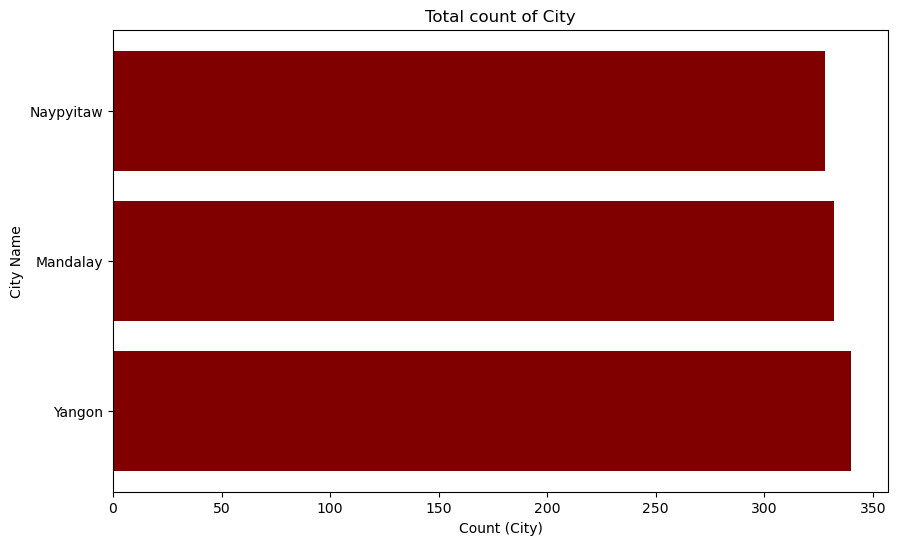

In [12]:
states = df['City'].value_counts()  
plt.figure(figsize=(10, 6))
plt.barh(states.index, states.values , color = 'maroon')
plt.xlabel ('Count (City)')
plt.ylabel ('City Name')
plt.title ('Total count of City')
plt.show()

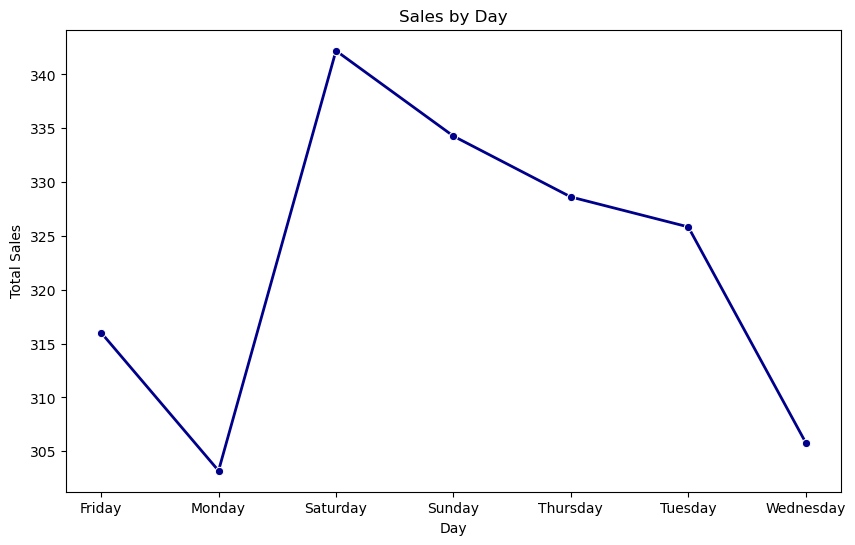

In [24]:
monthly_sales = df.groupby('Day')['Total'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Total', data= monthly_sales, marker='o', color='Darkblue', linewidth=2)
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Sales by Day')
plt.show()

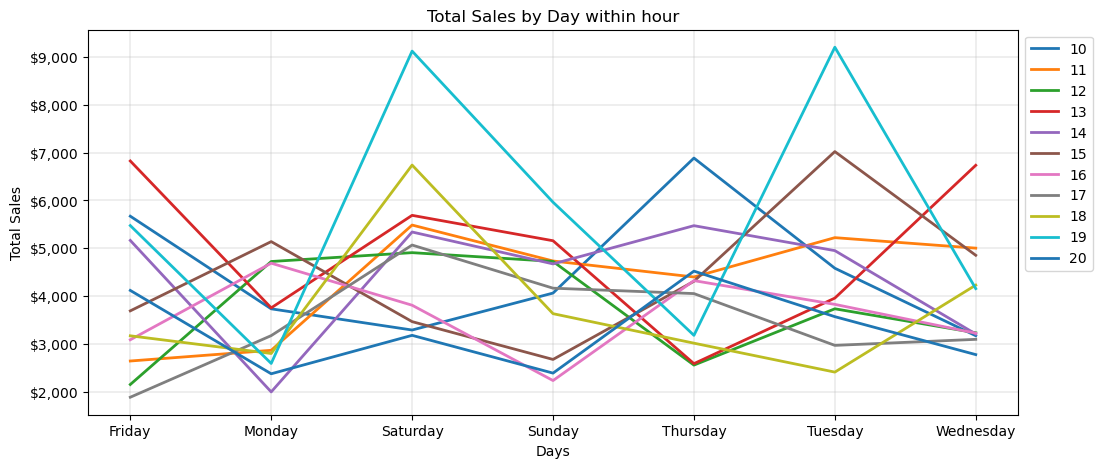

In [17]:
plt_group = df.groupby(['Day', 'Hour'])['Total'].sum().reset_index()
pivot_data = plt_group.pivot_table(index='Day', columns='Hour', values='Total')
ax = pivot_data.plot(kind='line', figsize=(12, 5), linewidth=2.0)
ax.grid(which='both', linewidth=0.3)
plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day within hour')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize='10')
plt.show()

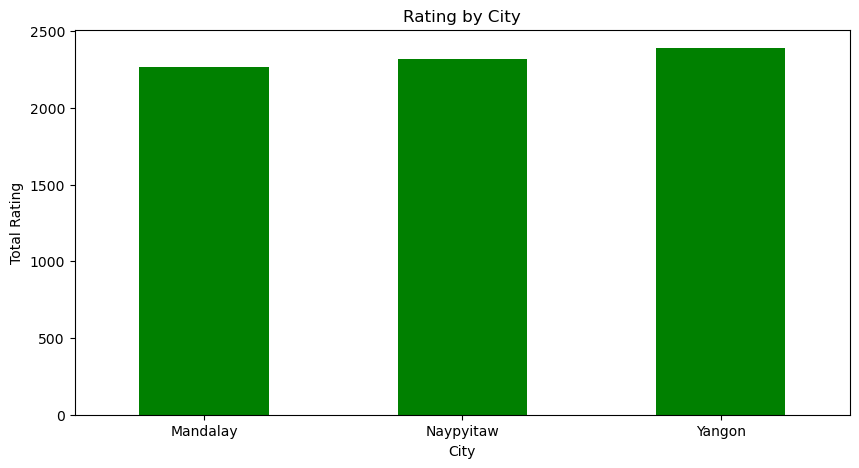

In [21]:
rating = df.groupby('City')['Rating'].sum()

plt.figure(figsize=(10, 5))
rating.plot(kind='bar', color='Green')
plt.title("Rating by City")
plt.xlabel("City")
plt.ylabel("Total Rating")
plt.xticks(rotation=0)
plt.show()

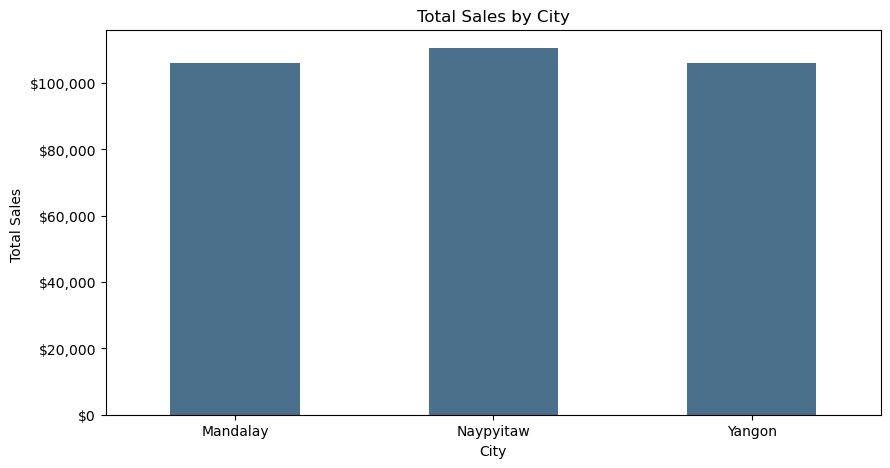

In [22]:
salescity = df.groupby('City')['Total'].sum()
revensalescityue_by_mall = salescity.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
salescity.plot(kind='bar', color='#4A708B')
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales ")
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)

plt.xticks(rotation=0)
plt.show()

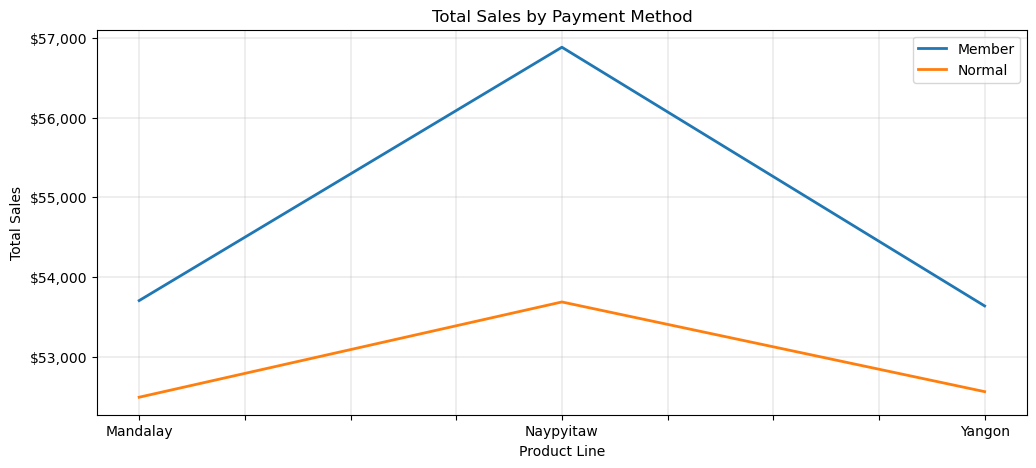

In [23]:
plt_group = df.groupby(['City', 'Customer type'])['Total'].sum().reset_index()
pivot_data = plt_group.pivot_table(index='City', columns='Customer type', values='Total')
ax = pivot_data.plot(kind='line', figsize=(12, 5), linewidth=2.0)
ax.grid(which='both', linewidth=0.3)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Payment Method')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize='10')
plt.show()